In [1]:
#Master Thesis: A data science approach to optimize electricvehicle charging clusters 
#- A more sustainable andprofitable operation of parking facility"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import math

In [204]:
# Read the filtered Data from car arrivals of China Town
sample_data = pd.read_csv('outputCT.csv')

In [205]:
# First impression of the consisting data
sample_data

,Unnamed: 0,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,BayId
0,3281,18167,02/21/2020 05:27:31 AM,02/21/2020 10:30:18 PM,1023,Chinatown,1007
1,5361,18167,03/22/2020 07:30:00 AM,03/23/2020 12:00:00 AM,990,Chinatown,1007
2,17774,18167,04/10/2020 10:30:18 PM,04/11/2020 12:00:00 AM,90,Chinatown,1007
3,34953,18167,04/10/2020 07:30:00 AM,04/11/2020 12:00:00 AM,990,Chinatown,1007
4,35096,18196,04/22/2020 04:55:50 AM,04/22/2020 09:58:37 PM,1023,Chinatown,878
...,...,...,...,...,...,...,...
204118,13747834,28758,04/01/2020 01:23:29 PM,04/01/2020 01:41:16 PM,18,Chinatown,869
204119,13747852,28758,03/02/2020 09:31:09 PM,03/02/2020 09:32:15 PM,1,Chinatown,869
204120,13747855,28758,02/22/2020 01:57:13 PM,02/22/2020 02:02:27 PM,5,Chinatown,869
204121,13747858,28758,02/23/2020 05:47:41 PM,02/23/2020 06:20:21 PM,33,Chinatown,869


In [206]:
# Check the Type of the collums 
type(sample_data.ArrivalTime.iloc[1])


str

In [207]:
# Use the fact that it is a string and the month is at the beginning
# Filter the data to get all the records from march
data = sample_data.ArrivalTime.str.startswith('03')

In [208]:
# New data set of true and false if it start with an 03 or not
data

0         False
1          True
2         False
3         False
4         False
          ...  
204118    False
204119     True
204120    False
204121    False
204122    False
Name: ArrivalTime, Length: 204123, dtype: bool

In [209]:
# Combine the two data to get the final data set which then only contains 03
sample_data = sample_data[data]
sample_data

,Unnamed: 0,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,BayId
1,5361,18167,03/22/2020 07:30:00 AM,03/23/2020 12:00:00 AM,990,Chinatown,1007
6,42790,18196,03/03/2020 07:30:00 AM,03/04/2020 12:00:00 AM,990,Chinatown,878
27,1099330,26526,03/20/2020 02:01:23 PM,03/20/2020 02:02:15 PM,1,Chinatown,932
29,1214087,25984,03/20/2020 01:39:38 PM,03/20/2020 01:39:57 PM,0,Chinatown,877
33,2583956,28758,03/18/2020 01:24:53 PM,03/18/2020 01:25:00 PM,1,Chinatown,869
...,...,...,...,...,...,...,...
204106,13747623,28758,03/08/2020 11:11:42 AM,03/08/2020 11:13:33 AM,2,Chinatown,869
204109,13747692,28758,03/04/2020 03:46:47 PM,03/04/2020 03:48:26 PM,2,Chinatown,869
204112,13747726,28758,03/17/2020 09:09:01 PM,03/17/2020 09:18:46 PM,9,Chinatown,869
204114,13747774,28758,03/09/2020 07:18:40 PM,03/09/2020 07:20:35 PM,2,Chinatown,869


In [210]:
# Change the type to work with the time in future steps
update_data= sample_data.astype({'ArrivalTime':'datetime64[ns]'})

In [211]:
# Change the type to work with the time in future steps
update_data2= update_data.astype({'DepartureTime':'datetime64[ns]'})

In [212]:
# Show new data set
update_data2

,Unnamed: 0,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,BayId
1,5361,18167,2020-03-22 07:30:00,2020-03-23 00:00:00,990,Chinatown,1007
6,42790,18196,2020-03-03 07:30:00,2020-03-04 00:00:00,990,Chinatown,878
27,1099330,26526,2020-03-20 14:01:23,2020-03-20 14:02:15,1,Chinatown,932
29,1214087,25984,2020-03-20 13:39:38,2020-03-20 13:39:57,0,Chinatown,877
33,2583956,28758,2020-03-18 13:24:53,2020-03-18 13:25:00,1,Chinatown,869
...,...,...,...,...,...,...,...
204106,13747623,28758,2020-03-08 11:11:42,2020-03-08 11:13:33,2,Chinatown,869
204109,13747692,28758,2020-03-04 15:46:47,2020-03-04 15:48:26,2,Chinatown,869
204112,13747726,28758,2020-03-17 21:09:01,2020-03-17 21:18:46,9,Chinatown,869
204114,13747774,28758,2020-03-09 19:18:40,2020-03-09 19:20:35,2,Chinatown,869


In [213]:
# Check if the type change worked
type(update_data2.ArrivalTime.iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

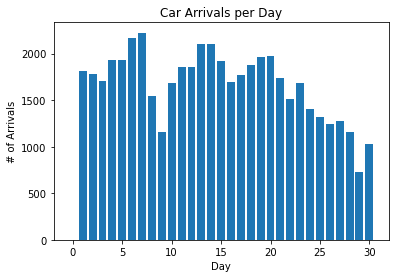

In [214]:
day_data_ev = []

# Append the count of car arrivals for every hour of the day
for i in range(0,31):
    day_data_ev.append([i,update_data2['ArrivalTime'].loc[(update_data2['ArrivalTime'].dt.day) == i].count()])

# Change array to DataFrame for visualization

day_data_ev = pd.DataFrame(day_data_ev)

# Bar chart the hour of day data and give labels
plt.bar(day_data_ev[0],day_data_ev[1])
plt.xlabel('Day')
plt.ylabel('# of Arrivals')
plt.title('Car Arrivals per Day')
plt.show()

In [215]:
# Define the days of the week
daysofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [216]:
dayofweek_data_ev = []

# Append the count of every day of the week to the array
for i in range(0,7):
    dayofweek_data_ev.append([i,update_data2['ArrivalTime'].loc[(update_data2['ArrivalTime'].dt.dayofweek) == i].count()])

# Change array to DataFrame for visualization
dayofweek_data_ev = pd.DataFrame(dayofweek_data_ev)

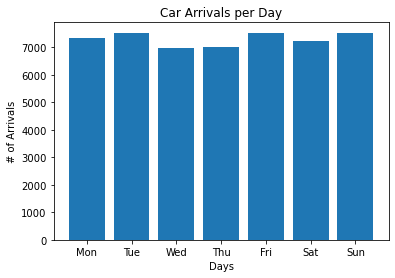

In [217]:
# Bar chart day of week data
plt.bar(daysofweek,dayofweek_data_ev[1])


# Give titles
plt.xlabel('Days')
plt.ylabel('# of Arrivals')
plt.title('Car Arrivals per Day')
plt.show()

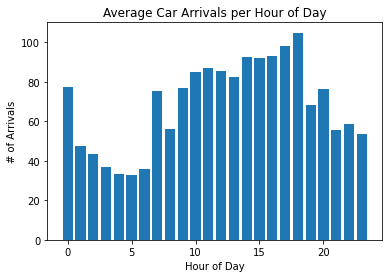

In [218]:
hourofday_data_ev = []

# Append the count of car arrivals for every hour of the day
for i in range(0,24):
    hourofday_data_ev.append([i,update_data2['ArrivalTime'].loc[(update_data2['ArrivalTime'].dt.hour) == i].count()])

# Change array to DataFrame for visualization
hourofday_data_ev = pd.DataFrame(hourofday_data_ev)
hourofday_data_ev[1] = hourofday_data_ev[1].div(31).round(2)

# Bar chart the hour of day data and give labels
plt.bar(hourofday_data_ev[0],hourofday_data_ev[1])
plt.xlabel('Hour of Day')
plt.ylabel('# of Arrivals')
plt.title('Average Car Arrivals per Hour of Day')
plt.show()

In [219]:
# Show the data
hourofday_data_ev

,0,1
0,0,77.42
1,1,47.68
2,2,43.48
3,3,36.77
4,4,33.23
5,5,32.97
6,6,35.84
7,7,75.48
8,8,56.19
9,9,76.74


In [ ]:
#The Duck Curve of California transformed to the "Duck Curve" of Mellbourne 
# California has 40 million and Melbourne has 5 mil inhabitants

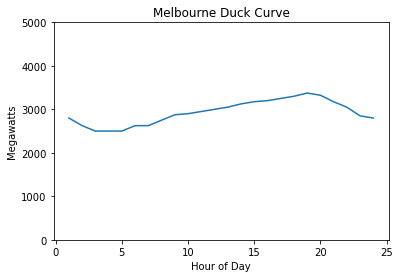

In [12]:
# plot the data
# x = hours
# y = Energy consumption

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y = [2800, 2625, 2500, 2500, 2500, 2625, 2625, 2750, 2875, 2900, 2950, 3000, 3050, 3125, 3175, 3200, 3250, 3300, 3375, 3325, 3175, 3050, 2850, 2800]

plt.ylim(ymin=0, ymax=5000)

plt.plot(x,y)
plt.xlabel('Hour of Day')
plt.ylabel('Megawatts')
plt.title('Melbourne Duck Curve')
plt.show()

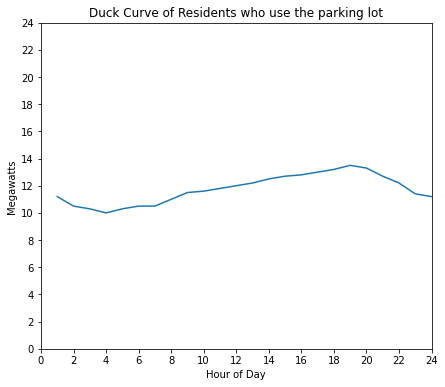

In [11]:
#Duck Curve for our Parking Space arrivals (204.199)
#This illustrate the impact better, since the Megawatts are reduce
# 5.000.000 / 200.000 = 250  --> 2.800 / 250 = 11,2
# x = hours
# y = Duck Curve

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y = [11.2, 10.5, 10.3, 10, 10.3, 10.5, 10.5, 11, 11.5, 11.6, 11.8, 12, 12.2, 12.5, 12.7, 12.8, 13, 13.2, 13.5, 13.3, 12.7, 12.2, 11.4, 11.2]


f = plt.figure()
f.set_figwidth(7)
f.set_figheight(6)

plt.ylim(ymin=0, ymax=20)
plt.xlim(xmin=0, xmax=24)
plt.xticks(np.arange(0, len(x)+1,2))
plt.yticks(np.arange(0, len(y)+1,2))


plt.plot(x,y)
plt.xlabel('Hour of Day')
plt.ylabel('Megawatts')
plt.title('Duck Curve of Residents who use the parking lot')
plt.show()



In [ ]:
# Results 1
# On this basis the results can be visualized
# The first results are focus only on the impact of home charging 
# This means in this simulations the amount of charging stations at the parking facility is zero

In [2]:
home_charge_energy = []

# read all the 100 exported csv files from the simulation
# add all records together to calculate the total consumption of one day 
for i in range(1,101):
    homedata = pd.read_csv('50homecharge +%i.csv'%(i))
    netenergy = homedata['1'].sum()
    home_charge_energy.append([i,netenergy])

    
# get the mean of 100 days / simulations    
home_charge_energy = pd.DataFrame(home_charge_energy)  
mean_home_energy = home_charge_energy[1].mean()

    

    

FileNotFoundError: [Errno 2] No such file or directory: '50homecharge +1.csv'

In [28]:
# show Data
home_charge_energy

,0,1
0,1,22776
1,2,22453
2,3,23272
3,4,22578
4,5,23367
...,...,...
95,96,23063
96,97,22260
97,98,23351
98,99,24176


In [29]:
#Mean home energy charging capacity over 100 Simulations
mean_home_energy

22332.29

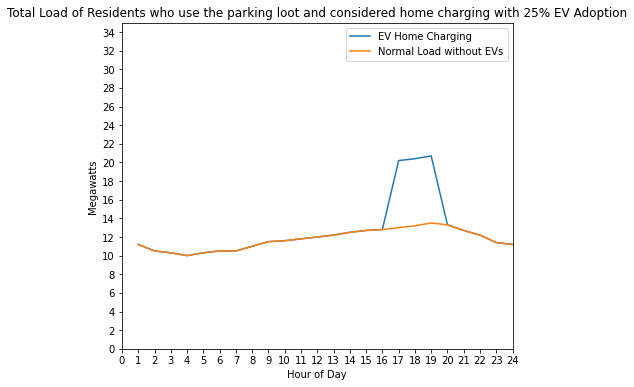

In [223]:
# Plot the data
# x = hours
# y = Duck Curve
# y2 = Duck Curve + Home charging

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y = [11.2, 10.5, 10.3, 10, 10.3, 10.5, 10.5, 11, 11.5, 11.6, 11.8, 12, 12.2, 12.5, 12.7, 12.8, 13, 13.2, 13.5, 13.3, 12.7, 12.2, 11.4, 11.2]

# Energy requiered 22 MW distributed 1/3 for 17,18,19pm when people are coming home from work
y2 = [11.2, 10.5, 10.3, 10, 10.3, 10.5, 10.5, 11, 11.5, 11.6, 11.8, 12, 12.2, 12.5, 12.7, 12.8, 20.2, 20.4, 20.7, 13.3, 12.7, 12.2, 11.4, 11.2]

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(6)

plt.ylim(ymin=0, ymax=35)
plt.xlim(xmin=0, xmax=24)
plt.xticks(np.arange(0, len(x)+1,1))
plt.yticks(np.arange(0, 35+1,2))

plt.xlabel('Hour of Day')
plt.ylabel('Megawatts')
plt.title('Total Load of Residents who use the parking loot and considered home charging with 25% EV Adoption')



plt.plot(x,y2, label="EV Home Charging")
plt.plot(x,y, label="Normal Load without EVs")
plt.legend()
plt.show()

In [ ]:
# Results 2:
# The next results represent the simulations with charging stations

In [224]:
home_charge_energy_with_EV_Spaces = []

# read all the 100 exported csv files from the simulation
# add all records together to calculate the total consumption of one day 
for i in range(1,101):
    homedata = pd.read_csv('homechargewithev +%i.csv'%(i))
    netenergy = homedata['1'].sum()
    home_charge_energy_with_EV_Spaces.append([i,netenergy])

# get the mean of 100 days / simulations 
home_charge_energy_with_EV_Spaces = pd.DataFrame(home_charge_energy_with_EV_Spaces)  
mean_home_energy = home_charge_energy_with_EV_Spaces[1].mean()


In [261]:
# Show data
home_charge_energy_with_EV_Spaces

,0,1
0,1,2057
1,2,2172
2,3,1218
3,4,1623
4,5,2047
...,...,...
95,96,1759
96,97,1557
97,98,1469
98,99,1831


In [267]:
#Mean home energy kw charging capacity over 100 Simulations with 10 EV Charger
mean_home_energy

1753.17

In [244]:
charge_energy_over_the_day = []


# read all the 100 exported csv files from the simulation about the chargers
# get the data for each hour
for i in range(1,101):
    chargedata = pd.read_csv('chargeenergy +%i.csv'%(i))
    chargedata['0'] = pd.to_datetime(chargedata['0'], unit='s')
    for i in range(0,24):
        charge_energy_over_the_day.append([i,sum(chargedata['1'].loc[(chargedata['0'].dt.hour) == i])])
        


In [245]:
# show data
charge_energy_over_the_day

[[0, 646],
 [1, 403],
 [2, 287],
 [3, 202],
 [4, 164],
 [5, 62],
 [6, 289],
 [7, 754],
 [8, 466],
 [9, 695],
 [10, 545],
 [11, 711],
 [12, 823],
 [13, 760],
 [14, 733],
 [15, 735],
 [16, 989],
 [17, 654],
 [18, 517],
 [19, 476],
 [20, 311],
 [21, 636],
 [22, 366],
 [23, 375],
 [0, 529],
 [1, 426],
 [2, 313],
 [3, 210],
 [4, 204],
 [5, 281],
 [6, 201],
 [7, 668],
 [8, 552],
 [9, 604],
 [10, 757],
 [11, 742],
 [12, 585],
 [13, 844],
 [14, 582],
 [15, 656],
 [16, 1011],
 [17, 776],
 [18, 506],
 [19, 739],
 [20, 483],
 [21, 378],
 [22, 521],
 [23, 505],
 [0, 364],
 [1, 570],
 [2, 511],
 [3, 147],
 [4, 219],
 [5, 316],
 [6, 348],
 [7, 444],
 [8, 287],
 [9, 466],
 [10, 539],
 [11, 959],
 [12, 529],
 [13, 1015],
 [14, 300],
 [15, 934],
 [16, 479],
 [17, 901],
 [18, 670],
 [19, 432],
 [20, 497],
 [21, 390],
 [22, 297],
 [23, 683],
 [0, 633],
 [1, 345],
 [2, 405],
 [3, 320],
 [4, 293],
 [5, 541],
 [6, 238],
 [7, 549],
 [8, 537],
 [9, 831],
 [10, 720],
 [11, 976],
 [12, 706],
 [13, 744],
 [14, 7

In [246]:
charge_energy_over_the_day = pd.DataFrame(charge_energy_over_the_day)
tmp = []

# summarize the data for each hour

for i in range(0,24):
        tmp.append([i,sum(charge_energy_over_the_day[1].loc[(charge_energy_over_the_day[0]) == i])])
        
tmp = pd.DataFrame(tmp) 

In [247]:
#show data
tmp

,0,1
0,0,59745
1,1,38281
2,2,33300
3,3,29995
4,4,27968
5,5,26700
6,6,26927
7,7,61299
8,8,39347
9,9,62163


In [248]:
# Calculate average per hour
tmp[1] = tmp[1].div(100).round(2)   

# Convert KW to megawatts
tmp[1] = tmp[1].div(1000).round(2) 

In [249]:
#show data
tmp

,0,1
0,0,0.60
1,1,0.38
2,2,0.33
3,3,0.30
4,4,0.28
5,5,0.27
6,6,0.27
7,7,0.61
8,8,0.39
9,9,0.62


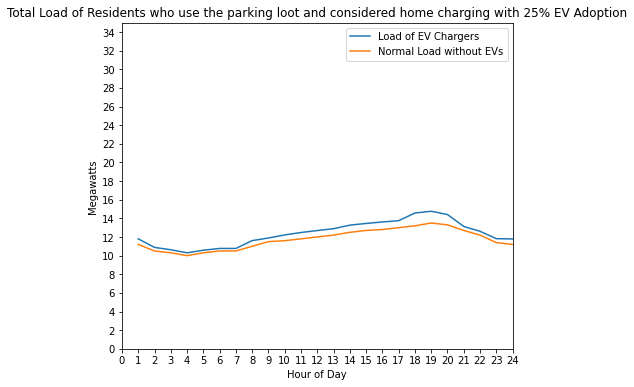

In [278]:
# plot the results
# x = hours
# y = duck curve

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y = [11.2, 10.5, 10.3, 10, 10.3, 10.5, 10.5, 11, 11.5, 11.6, 11.8, 12, 12.2, 12.5, 12.7, 12.8, 13, 13.2, 13.5, 13.3, 12.7, 12.2, 11.4, 11.2]

# Add new Energy requiered from EV Charger over the Day
sumCharge = tmp[1] + y
# Add new Energy requied from Home Charging in the evening 1.7 MW
sumCharge[17] = sumCharge[17] + 0.5
sumCharge[18] = sumCharge[18] + 0.7
sumCharge[19] = sumCharge[19] + 0.5

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(6)

plt.ylim(ymin=0, ymax=35)
plt.xlim(xmin=0, xmax=24)
plt.xticks(np.arange(0, len(x)+1,1))
plt.yticks(np.arange(0, 35+1,2))

plt.xlabel('Hour of Day')
plt.ylabel('Megawatts')
plt.title('Total Load of Residents who use the parking loot and considered home charging with 25% EV Adoption')



plt.plot(x,sumCharge, label="Load of EV Chargers")
plt.plot(x,y, label="Normal Load without EVs")
plt.legend()
plt.show()

In [238]:
# Sensitive
#PV will be integrated; we start with 3 PVs

In [147]:

home_charge_energy_with_EV_Spaces_PV35 = []

# read all the 100 exported csv files from the simulation
# add all records together to calculate the total consumption of one day
for i in range(1,101):
    homedata35 = pd.read_csv('35homechargewithevandPV +%i.csv'%(i))
    netenergy35 = homedata35['1'].sum()
    home_charge_energy_with_EV_Spaces_PV35.append([i,netenergy35])

# get the mean of 100 days / simulations
home_charge_energy_with_EV_Spaces_PV35 = pd.DataFrame(home_charge_energy_with_EV_Spaces_PV35)  
mean_home_energy35 = home_charge_energy_with_EV_Spaces_PV35[1].mean()



In [148]:
# Show the mean
mean_home_energy35

8517.8

In [149]:
# Day Energy Consumption with PVs

charge_energy_over_the_day_withPV35 = []

# read all the 100 exported csv files from the simulation about the chargers
# get the data for each hour
for i in range(1,101):
    chargedata35 = pd.read_csv('35chargeenergywithPV +%i.csv'%(i))
    chargedata35['0'] = pd.to_datetime(chargedata35['0'], unit='s')
    for i in range(0,24):
        charge_energy_over_the_day_withPV35.append([i,sum(chargedata35['1'].loc[(chargedata35['0'].dt.hour) == i])])

In [150]:
charge_energy_over_the_day_withPV35 = pd.DataFrame(charge_energy_over_the_day_withPV35)
tmp35 = []


# summarize the data for each hour
for i in range(0,24):
        tmp35.append([i,sum(charge_energy_over_the_day_withPV35[1].loc[(charge_energy_over_the_day_withPV35[0]) == i])])
        
tmp35 = pd.DataFrame(tmp35) 

In [151]:
# Calculate average per hour
tmp35[1] = tmp35[1].div(100).round(2)   

# Convert KW to Megawatt
tmp35[1] = tmp35[1].div(1000).round(2) 

In [152]:

home_charge_energy_with_EV_Spaces_PV = []

# read all the 100 exported csv files from the simulation
# add all records together to calculate the total consumption of one day
for i in range(1,101):
    homedata = pd.read_csv('50homechargewithevandPV +%i.csv'%(i))
    netenergy = homedata['1'].sum()
    home_charge_energy_with_EV_Spaces_PV.append([i,netenergy])

# get the mean of 100 days / simulations
home_charge_energy_with_EV_Spaces_PV = pd.DataFrame(home_charge_energy_with_EV_Spaces_PV)  
mean_home_energy = home_charge_energy_with_EV_Spaces_PV[1].mean()



In [153]:
# Show the mean
mean_home_energy

8518.0

In [154]:

home_charge_energy_with_EV_Spaces_PV25 = []

# read all the 100 exported csv files from the simulation
# add all records together to calculate the total consumption of one day
for i in range(1,101):
    homedata25 = pd.read_csv('25homechargewithevandPV +%i.csv'%(i))
    netenergy25 = homedata25['1'].sum()
    home_charge_energy_with_EV_Spaces_PV25.append([i,netenergy25])

# get the mean of 100 days / simulations
home_charge_energy_with_EV_Spaces_PV25 = pd.DataFrame(home_charge_energy_with_EV_Spaces_PV25)  
mean_home_energy25 = home_charge_energy_with_EV_Spaces_PV25[1].mean()



In [155]:
# Show the mean
mean_home_energy25

8518.4

In [156]:
# Day Energy Consumption with PVs

charge_energy_over_the_day_withPV25 = []

# read all the 100 exported csv files from the simulation about the chargers
# get the data for each hour
for i in range(1,101):
    chargedata25 = pd.read_csv('25chargeenergywithPV +%i.csv'%(i))
    chargedata25['0'] = pd.to_datetime(chargedata25['0'], unit='s')
    for i in range(0,24):
        charge_energy_over_the_day_withPV25.append([i,sum(chargedata25['1'].loc[(chargedata25['0'].dt.hour) == i])])

In [157]:
charge_energy_over_the_day_withPV25 = pd.DataFrame(charge_energy_over_the_day_withPV25)
tmp25 = []


# summarize the data for each hour
for i in range(0,24):
        tmp25.append([i,sum(charge_energy_over_the_day_withPV25[1].loc[(charge_energy_over_the_day_withPV25[0]) == i])])
        
tmp25 = pd.DataFrame(tmp25) 

In [158]:
# Calculate average per hour
tmp25[1] = tmp25[1].div(100).round(2)   

# Convert KW to Megawatt
tmp25[1] = tmp25[1].div(1000).round(2) 

In [159]:

home_charge_energy_with_EV_Spaces_PV100 = []

# read all the 100 exported csv files from the simulation
# add all records together to calculate the total consumption of one day
for i in range(1,101):
    homedata100 = pd.read_csv('100homechargewithevandPV +%i.csv'%(i))
    netenergy100 = homedata100['1'].sum()
    home_charge_energy_with_EV_Spaces_PV100.append([i,netenergy100])

# get the mean of 100 days / simulations
home_charge_energy_with_EV_Spaces_PV100 = pd.DataFrame(home_charge_energy_with_EV_Spaces_PV100)  
mean_home_energy100 = home_charge_energy_with_EV_Spaces_PV100[1].mean()



In [160]:
# Show the mean
mean_home_energy100

8520.1

In [161]:
# Day Energy Consumption with PVs

charge_energy_over_the_day_withPV100 = []

# read all the 100 exported csv files from the simulation about the chargers
# get the data for each hour
for i in range(1,101):
    chargedata100 = pd.read_csv('100chargeenergywithPV +%i.csv'%(i))
    chargedata100['0'] = pd.to_datetime(chargedata100['0'], unit='s')
    for i in range(0,24):
        charge_energy_over_the_day_withPV100.append([i,sum(chargedata100['1'].loc[(chargedata100['0'].dt.hour) == i])])

In [162]:
charge_energy_over_the_day_withPV100 = pd.DataFrame(charge_energy_over_the_day_withPV100)
tmp100 = []


# summarize the data for each hour
for i in range(0,24):
        tmp100.append([i,sum(charge_energy_over_the_day_withPV100[1].loc[(charge_energy_over_the_day_withPV100[0]) == i])])
        
tmp100 = pd.DataFrame(tmp100) 

In [163]:
# Calculate average per hour
tmp100[1] = tmp100[1].div(100).round(2)   

# Convert KW to Megawatt
tmp100[1] = tmp100[1].div(1000).round(2) 

In [164]:

home_charge_energy_with_EV_Spaces_PV75 = []

# read all the 100 exported csv files from the simulation
# add all records together to calculate the total consumption of one day
for i in range(1,101):
    homedata75 = pd.read_csv('75homechargewithevandPV +%i.csv'%(i))
    netenergy75 = homedata75['1'].sum()
    home_charge_energy_with_EV_Spaces_PV75.append([i,netenergy75])

# get the mean of 100 days / simulations
home_charge_energy_with_EV_Spaces_PV75 = pd.DataFrame(home_charge_energy_with_EV_Spaces_PV75)  
mean_home_energy75 = home_charge_energy_with_EV_Spaces_PV75[1].mean()



In [165]:
# Show the mean
mean_home_energy75

2293.99

In [166]:
# Day Energy Consumption with PVs

charge_energy_over_the_day_withPV75 = []

# read all the 100 exported csv files from the simulation about the chargers
# get the data for each hour
for i in range(1,101):
    chargedata75 = pd.read_csv('75chargeenergywithPV +%i.csv'%(i))
    chargedata75['0'] = pd.to_datetime(chargedata75['0'], unit='s')
    for i in range(0,24):
        charge_energy_over_the_day_withPV75.append([i,sum(chargedata75['1'].loc[(chargedata75['0'].dt.hour) == i])])

In [167]:
charge_energy_over_the_day_withPV75 = pd.DataFrame(charge_energy_over_the_day_withPV75)
tmp75 = []


# summarize the data for each hour
for i in range(0,24):
        tmp75.append([i,sum(charge_energy_over_the_day_withPV75[1].loc[(charge_energy_over_the_day_withPV75[0]) == i])])
        
tmp75 = pd.DataFrame(tmp75) 

In [168]:
# Calculate average per hour
tmp75[1] = tmp75[1].div(100).round(2)   

# Convert KW to Megawatt
tmp75[1] = tmp75[1].div(1000).round(2) 

In [169]:
# Day Energy Consumption with PVs

charge_energy_over_the_day_withPV = []

# read all the 100 exported csv files from the simulation about the chargers
# get the data for each hour
for i in range(1,101):
    chargedata = pd.read_csv('50chargeenergywithPV +%i.csv'%(i))
    chargedata['0'] = pd.to_datetime(chargedata['0'], unit='s')
    for i in range(0,24):
        charge_energy_over_the_day_withPV.append([i,sum(chargedata['1'].loc[(chargedata['0'].dt.hour) == i])])

In [170]:
charge_energy_over_the_day_withPV = pd.DataFrame(charge_energy_over_the_day_withPV)
tmp1 = []


# summarize the data for each hour
for i in range(0,24):
        tmp1.append([i,sum(charge_energy_over_the_day_withPV[1].loc[(charge_energy_over_the_day_withPV[0]) == i])])
        
tmp1 = pd.DataFrame(tmp1) 

In [171]:
# Calculate average per hour
tmp1[1] = tmp1[1].div(100).round(2)   

# Convert KW to Megawatt
tmp1[1] = tmp1[1].div(1000).round(2) 

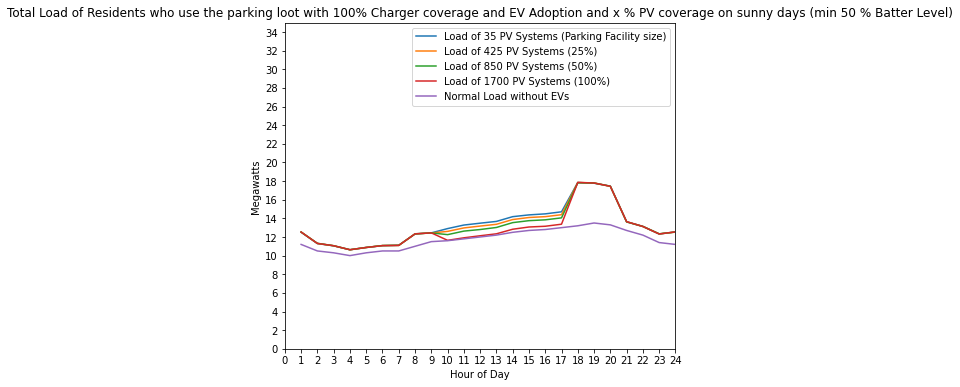

In [174]:
# plot the results
# x = hours
# y = duck curve

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y = [11.2, 10.5, 10.3, 10, 10.3, 10.5, 10.5, 11, 11.5, 11.6, 11.8, 12, 12.2, 12.5, 12.7, 12.8, 13, 13.2, 13.5, 13.3, 12.7, 12.2, 11.4, 11.2]

# Add new Energy requiered from EV Charger over the Day 35
sumCharge5 = tmp35[1] + y
# Add new Energy requied from Home Charging in the evening 8.5 MW
sumCharge5[17] = sumCharge5[17] + 2.8
sumCharge5[18] = sumCharge5[18] + 2.9
sumCharge5[19] = sumCharge5[19] + 2.8

# Add new Energy requiered from EV Charger over the Day 25
sumCharge4 = tmp25[1] + y
# Add new Energy requied from Home Charging in the evening 8.5 MW
sumCharge4[17] = sumCharge4[17] + 2.8
sumCharge4[18] = sumCharge4[18] + 2.9
sumCharge4[19] = sumCharge4[19] + 2.8

# Add new Energy requiered from EV Charger over the Day 50
sumCharge1 = tmp1[1] + y
# Add new Energy requied from Home Charging in the evening 8.5 MW
sumCharge1[17] = sumCharge1[17] + 2.8
sumCharge1[18] = sumCharge1[18] + 2.9
sumCharge1[19] = sumCharge1[19] + 2.8

# Add new Energy requiered from EV Charger over the Day 75
sumCharge2 = tmp75[1] + y
# Add new Energy requied from Home Charging in the evening 4.3 MW
sumCharge2[17] = sumCharge2[17] + 0.7
sumCharge2[18] = sumCharge2[18] + 0.9
sumCharge2[19] = sumCharge2[19] + 0.7

# Add new Energy requiered from EV Charger over the Day 100
sumCharge3 = tmp100[1] + y
# Add new Energy requied from Home Charging in the evening 8.5 MW
sumCharge3[17] = sumCharge3[17] + 2.8
sumCharge3[18] = sumCharge3[18] + 2.9
sumCharge3[19] = sumCharge3[19] + 2.8


f = plt.figure()
f.set_figwidth(7)
f.set_figheight(6)

plt.ylim(ymin=0, ymax=35)
plt.xlim(xmin=0, xmax=24)
plt.xticks(np.arange(0, len(x)+1,1))
plt.yticks(np.arange(0, 35+1,2))

plt.xlabel('Hour of Day')
plt.ylabel('Megawatts')
plt.title('Total Load of Residents who use the parking loot with 100% Charger coverage and EV Adoption and x % PV coverage on sunny days (min 50 % Batter Level)')

plt.plot(x,sumCharge5, label="Load of 35 PV Systems (Parking Facility size)")
plt.plot(x,sumCharge4, label="Load of 425 PV Systems (25%)")
plt.plot(x,sumCharge1, label="Load of 850 PV Systems (50%)")

plt.plot(x,sumCharge3, label="Load of 1700 PV Systems (100%)")
#plt.plot(x,sumCharge2, label="Load of 850 PV Systems (200%)")
plt.plot(x,y, label="Normal Load without EVs")
plt.legend()
plt.show()

In [119]:
#Data Analysis of the PV Energy production

In [29]:

charge_energy_over_the_day_ofPV = []


# read all the 100 exported csv files from the simulation about the consumption of the PV Energy
# get the data for each hour
for i in range(1,101):
    chargedata = pd.read_csv('25PVEnergyConsumption +%i.csv'%(i))
    chargedata['0'] = pd.to_datetime(chargedata['0'], unit='s')
    for i in range(0,24):
        charge_energy_over_the_day_ofPV.append([i,sum(chargedata['1'].loc[(chargedata['0'].dt.hour) == i])])

In [30]:
charge_energy_over_the_day_ofPV = pd.DataFrame(charge_energy_over_the_day_ofPV)
tmp2 = []

# summarize the data for each hour
for i in range(0,24):
        tmp2.append([i,sum(charge_energy_over_the_day_ofPV[1].loc[(charge_energy_over_the_day_ofPV[0]) == i])])
        
tmp2 = pd.DataFrame(tmp2) 

In [31]:
# Calculate average per hour
tmp2[1] = tmp2[1].div(100).round(3)  


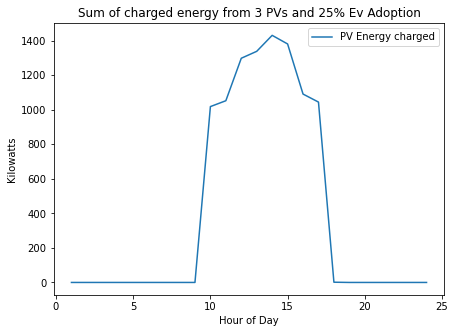

In [32]:
# plot the data
# x = hours
# tmp2 = energy consumption from the PV

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

tmp2


f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)



plt.xlabel('Hour of Day')
plt.ylabel('Kilowatts')
plt.title('Sum of charged energy from 3 PVs and 25% Ev Adoption')



plt.plot(x,tmp2[1], label="PV Energy charged")

plt.legend()
plt.show()

In [ ]:
# Sensitive Analysis